# **1. Introduction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Nhận dạng Chữ số Viết tay bằng Mạng Nơ-ron Tích chập (CNN)**

Nhận dạng chữ số viết tay là quá trình số hóa hình ảnh chữ số do con người viết. Đây là một nhiệm vụ khó khăn vì chữ số viết tay thường không chuẩn và có nhiều kiểu dáng khác nhau. Để giải quyết vấn đề này, dự án sử dụng mạng nơ-ron tích chập (CNN) được xây dựng bằng TensorFlow để nhận diện chữ số viết tay.

CNN là một thuật toán Học Sâu chuyên phân tích hình ảnh, nhận dạng đối tượng, phân loại ảnh, v.v. Trong mô hình này, chúng tôi sử dụng mô hình Keras tuần tự gồm các lớp Convolution2D và MaxPooling2D để rút gọn và chuyển đổi hình ảnh, cuối cùng là lớp Dense với 10 đầu ra Softmax biểu diễn xác suất dự đoán cho từng chữ số (0-9).

**Kết quả**: Mô hình đạt độ chính xác kiểm tra là 99.94% với loss là 4.5%.

**Kết luận**: Mô hình CNN đã nhận dạng chữ số viết tay một cách hiệu quả với độ chính xác cao, chứng minh khả năng ứng dụng của Python và TensorFlow trong lĩnh vực nhận dạng chữ số viết tay.

# **2. Chuẩn bị dữ liệu và cài đặt thư viện**


## **Load data**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd
import math
import datetime
import platform

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Python/bài tập cuối kì/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Python/bài tập cuối kì/test.csv')

# **3. Data overview**

## **3.1 Tiền xử lý dữ liệu**

Bộ dữ liệu MNIST chứa 42.000 ảnh huấn luyện về các chữ số viết tay từ 0 đến 9 (10 lớp khác nhau) và 28.000 ảnh dùng để kiểm tra mà không có nhãn (để nộp kết quả). Các ảnh này là ảnh xám (grayscale) với các giá trị pixel và được biểu diễn dưới dạng ma trận 28×28.

In [ ]:
train.info(), train.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [ ]:
test.info(), test.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

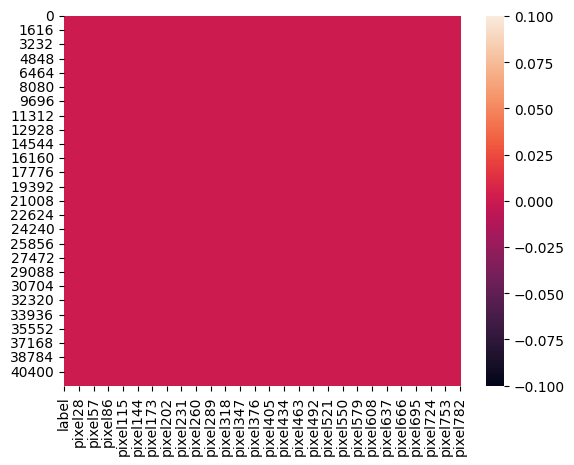

In [ ]:
#kiểm tra có dữ liệu bị thiếu không
sns.heatmap(train.isnull())

In [ ]:
train.isna().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
test.isna().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

## **3.2 Trực quan hóa dữ liệu**


T-SNE (t-Distributed Stochastic Neighbor Embedding) là một thuật toán giảm chiều dữ liệu, giúp trực quan hóa dữ liệu có nhiều chiều (như ảnh) bằng cách chuyển chúng thành dữ liệu hai chiều hoặc ba chiều. Điều này giúp dễ dàng quan sát và phát hiện ra các mẫu hay sự phân cụm trong dữ liệu, đặc biệt là dữ liệu phức tạp như các chữ số viết tay trong bộ MNIST.

In [ ]:
y.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


<ipython-input-4-e160aaacb13c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=counts, palette=colors)


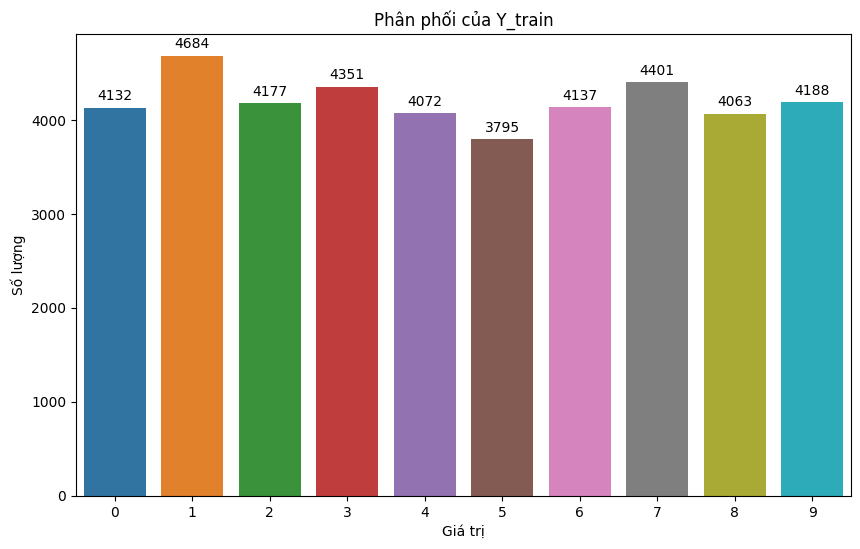

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đếm số lần xuất hiện của mỗi giá trị từ 0 đến 9
value_counts = y.value_counts().sort_index()
labels = value_counts.index
counts = value_counts.values

# Đặt màu sắc khác nhau cho từng giá trị từ 0 đến 9
colors = sns.color_palette("tab10", len(labels))

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=labels, y=counts, palette=colors)

# Thêm nhãn số lượng trên đầu mỗi thanh
for bar, count in zip(bars.patches, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
             f'{int(count)}', ha='center', va='bottom')

plt.title('Phân phối của Y_train')
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')
plt.show()


In [ ]:
from sklearn.manifold import TSNE
sample_size = 5000 # lấy mẫu dựa trên 5000 tập dữ liệu
X_sample = X.sample(sample_size, random_state=42) / 255
tsne = TSNE(n_components=2, random_state=42)
tsne_res = tsne.fit_transform(X_sample)

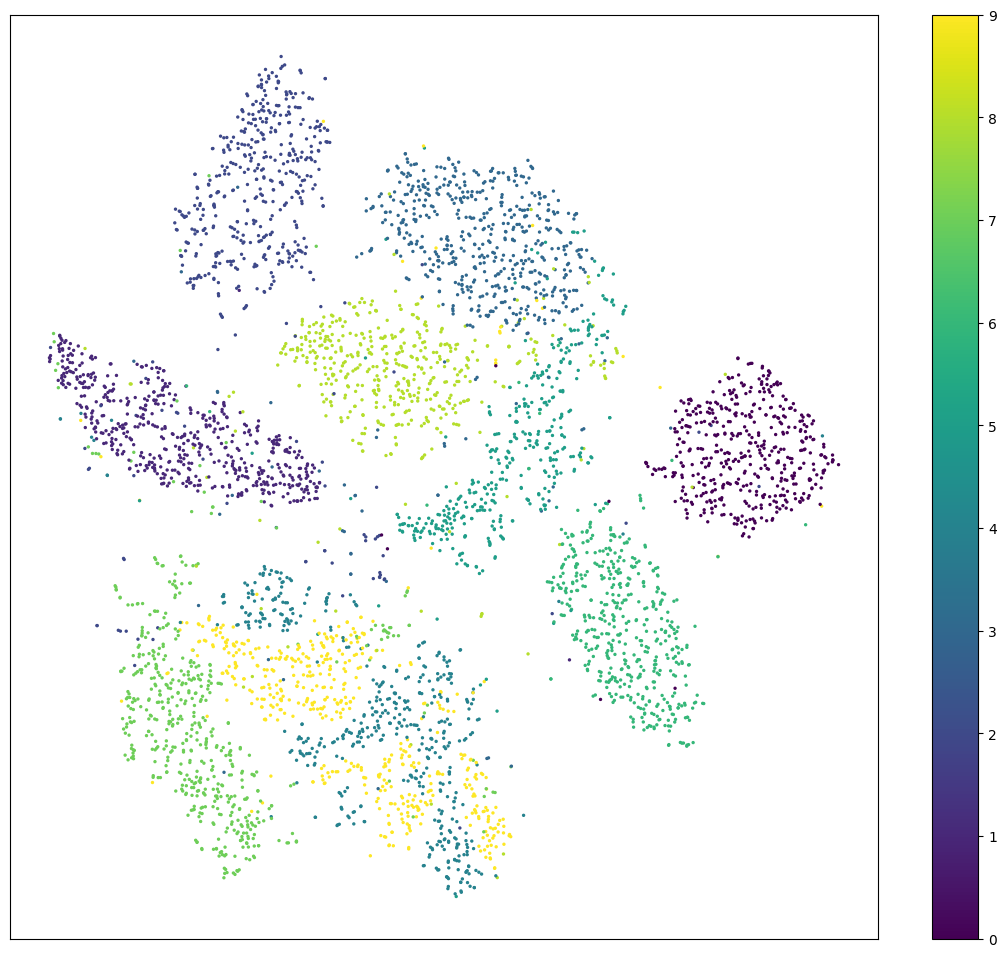

In [ ]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y.iloc[X_sample.index], s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

## **3.3 | Chia tập dữ liệu thành 2 tập riêng biệt**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

## **3.4 Kích thước của dữ liệu train và dữ liệu validation**

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


## **3.5 Chuyển đổi dữ liệu huấn luyện, kiểm tra và xác nhận thành mảng**

In [ ]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

## **3.6 Kích thước của dữ liệu train, test và validation sau khi thay đổi hình dạng**

In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


#**4. Khám phá dữ liệu**

In [ ]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


## **4.1 | Trực quan hóa cách các chữ số được viết tay**

### **4.1.1 Hình ảnh của chữ số viết tay đầu tiên dưới dạng ảnh đen trắng**

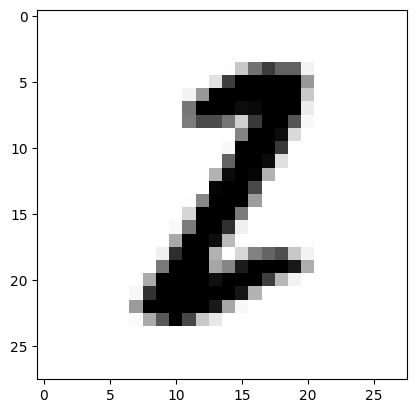

In [ ]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

### **4.1.2 Một số ví dụ huấn luyện để hiểu cách chữ số được viết**

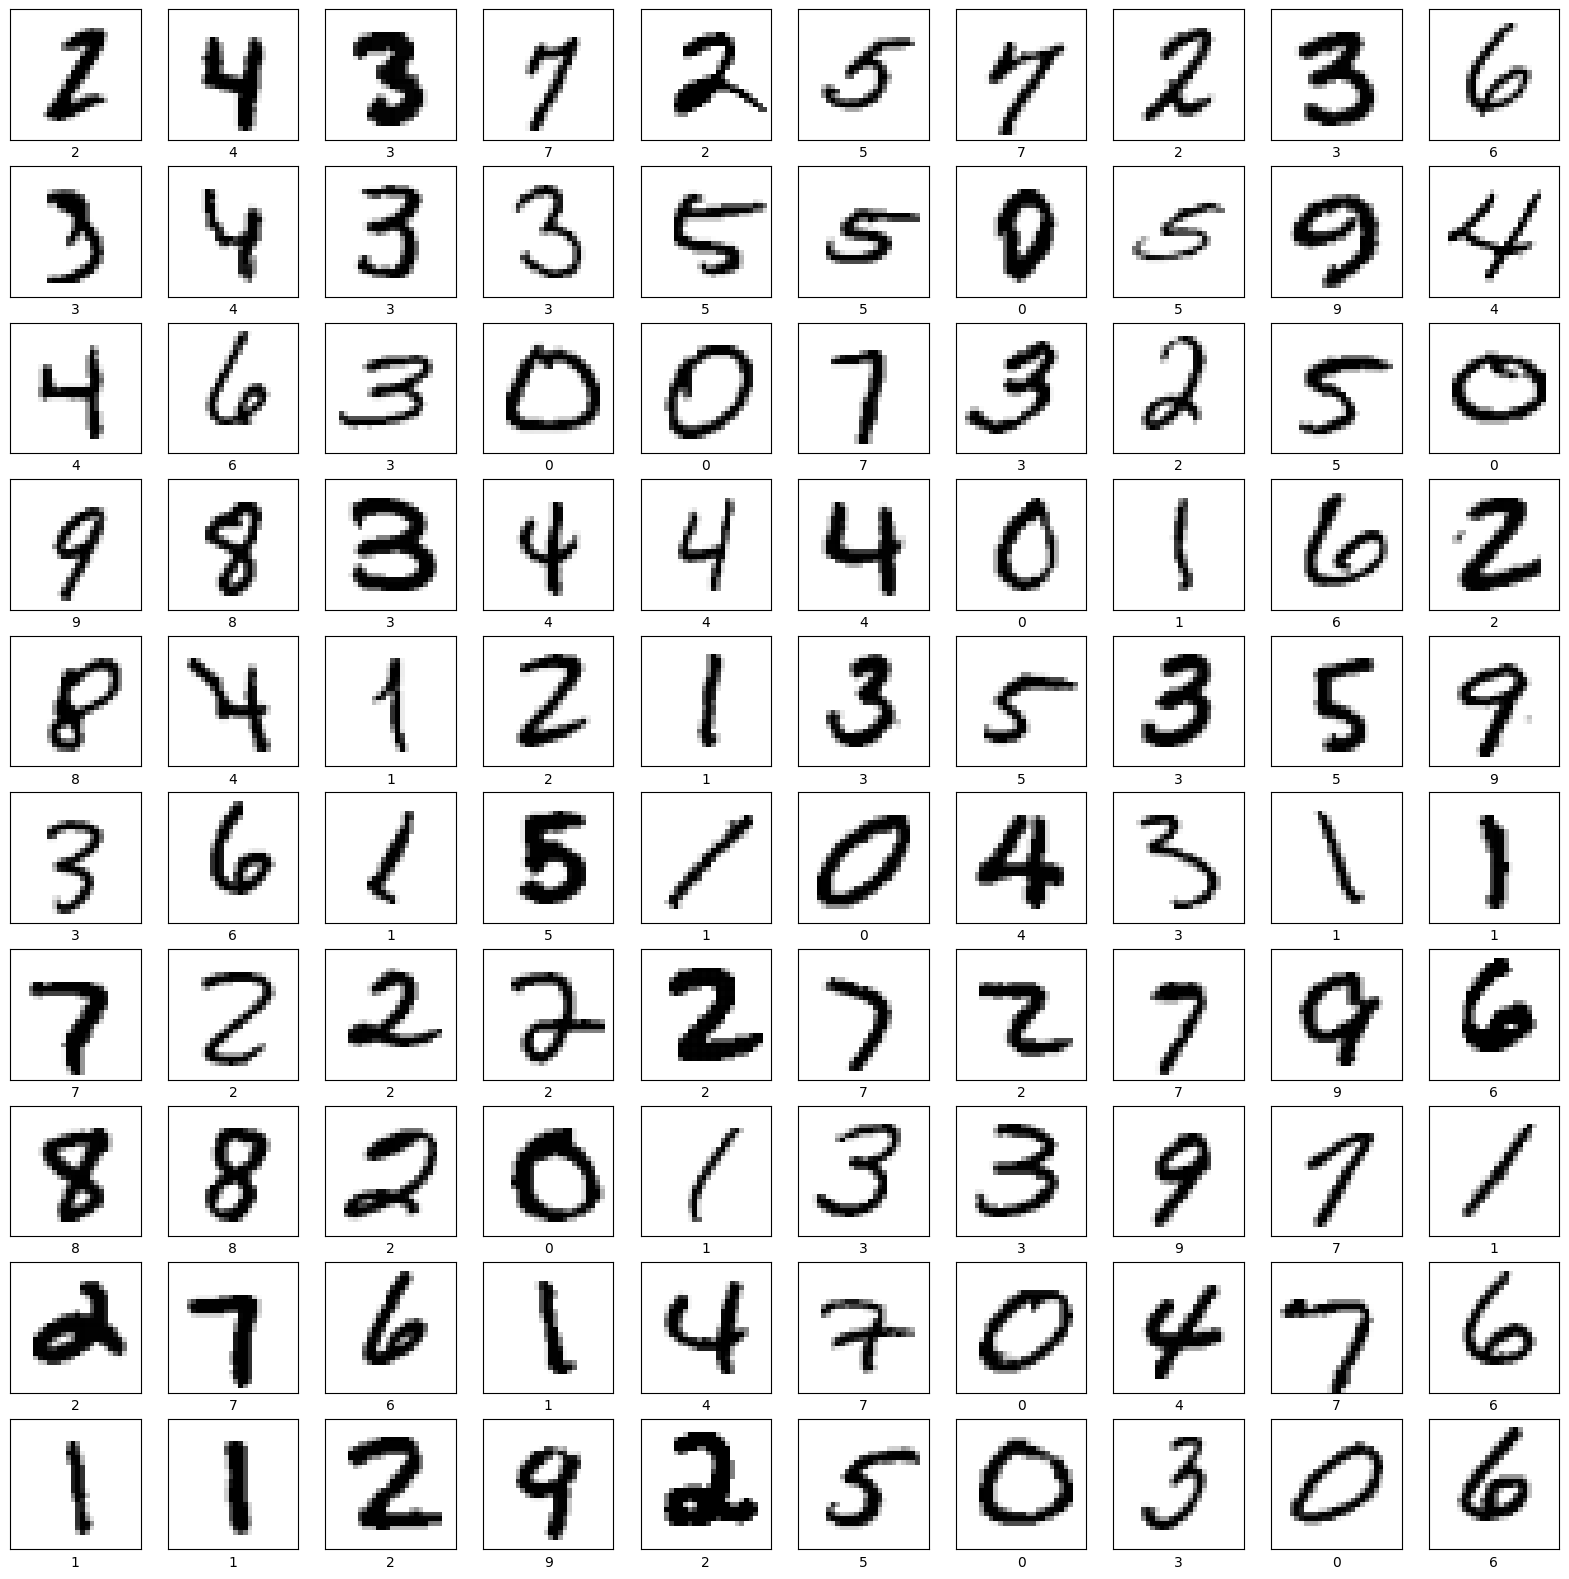

In [ ]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

## **4.2 | Reshaping train, test, và validation data**

In [ ]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


## **4.3 | Chuẩn hóa dữ liệu train, test, và validation**

In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

**Chuẩn hóa dữ liệu**
 việc chuẩn hóa dữ liệu bằng cách chia cho 255 giúp cải thiện hiệu suất của mô hình, tăng tốc độ học, và giúp mạng nơ-ron học ổn định hơn.

#**5 | Xây dựng mô hình Mạng Nơ-ron Tích chập (CNN) để phân loại chữ số viết tay**



*   **Conv2D:** Thực hiện các phép toán tích chập (convolution), giúp mô hình nhận diện các đặc trưng của ảnh.
*   **MaxPooling2D:** Giảm kích thước ảnh, giúp giảm số lượng tham số và tăng tốc độ huấn luyện.
*   **Flatten**: Chuyển đổi các ma trận đầu ra thành vector để có thể đưa vào lớp Dense.
*   **Dense**: Lớp fully connected giúp mô hình đưa ra dự đoán cuối cùng.
*  **Softmax**: Hàm kích hoạt ở lớp cuối giúp mô hình phân loại cho 10 chữ số (0-9).







In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **5.1 | Summary of the training model**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

### **5.2 | Trực quan hóa mô hình**

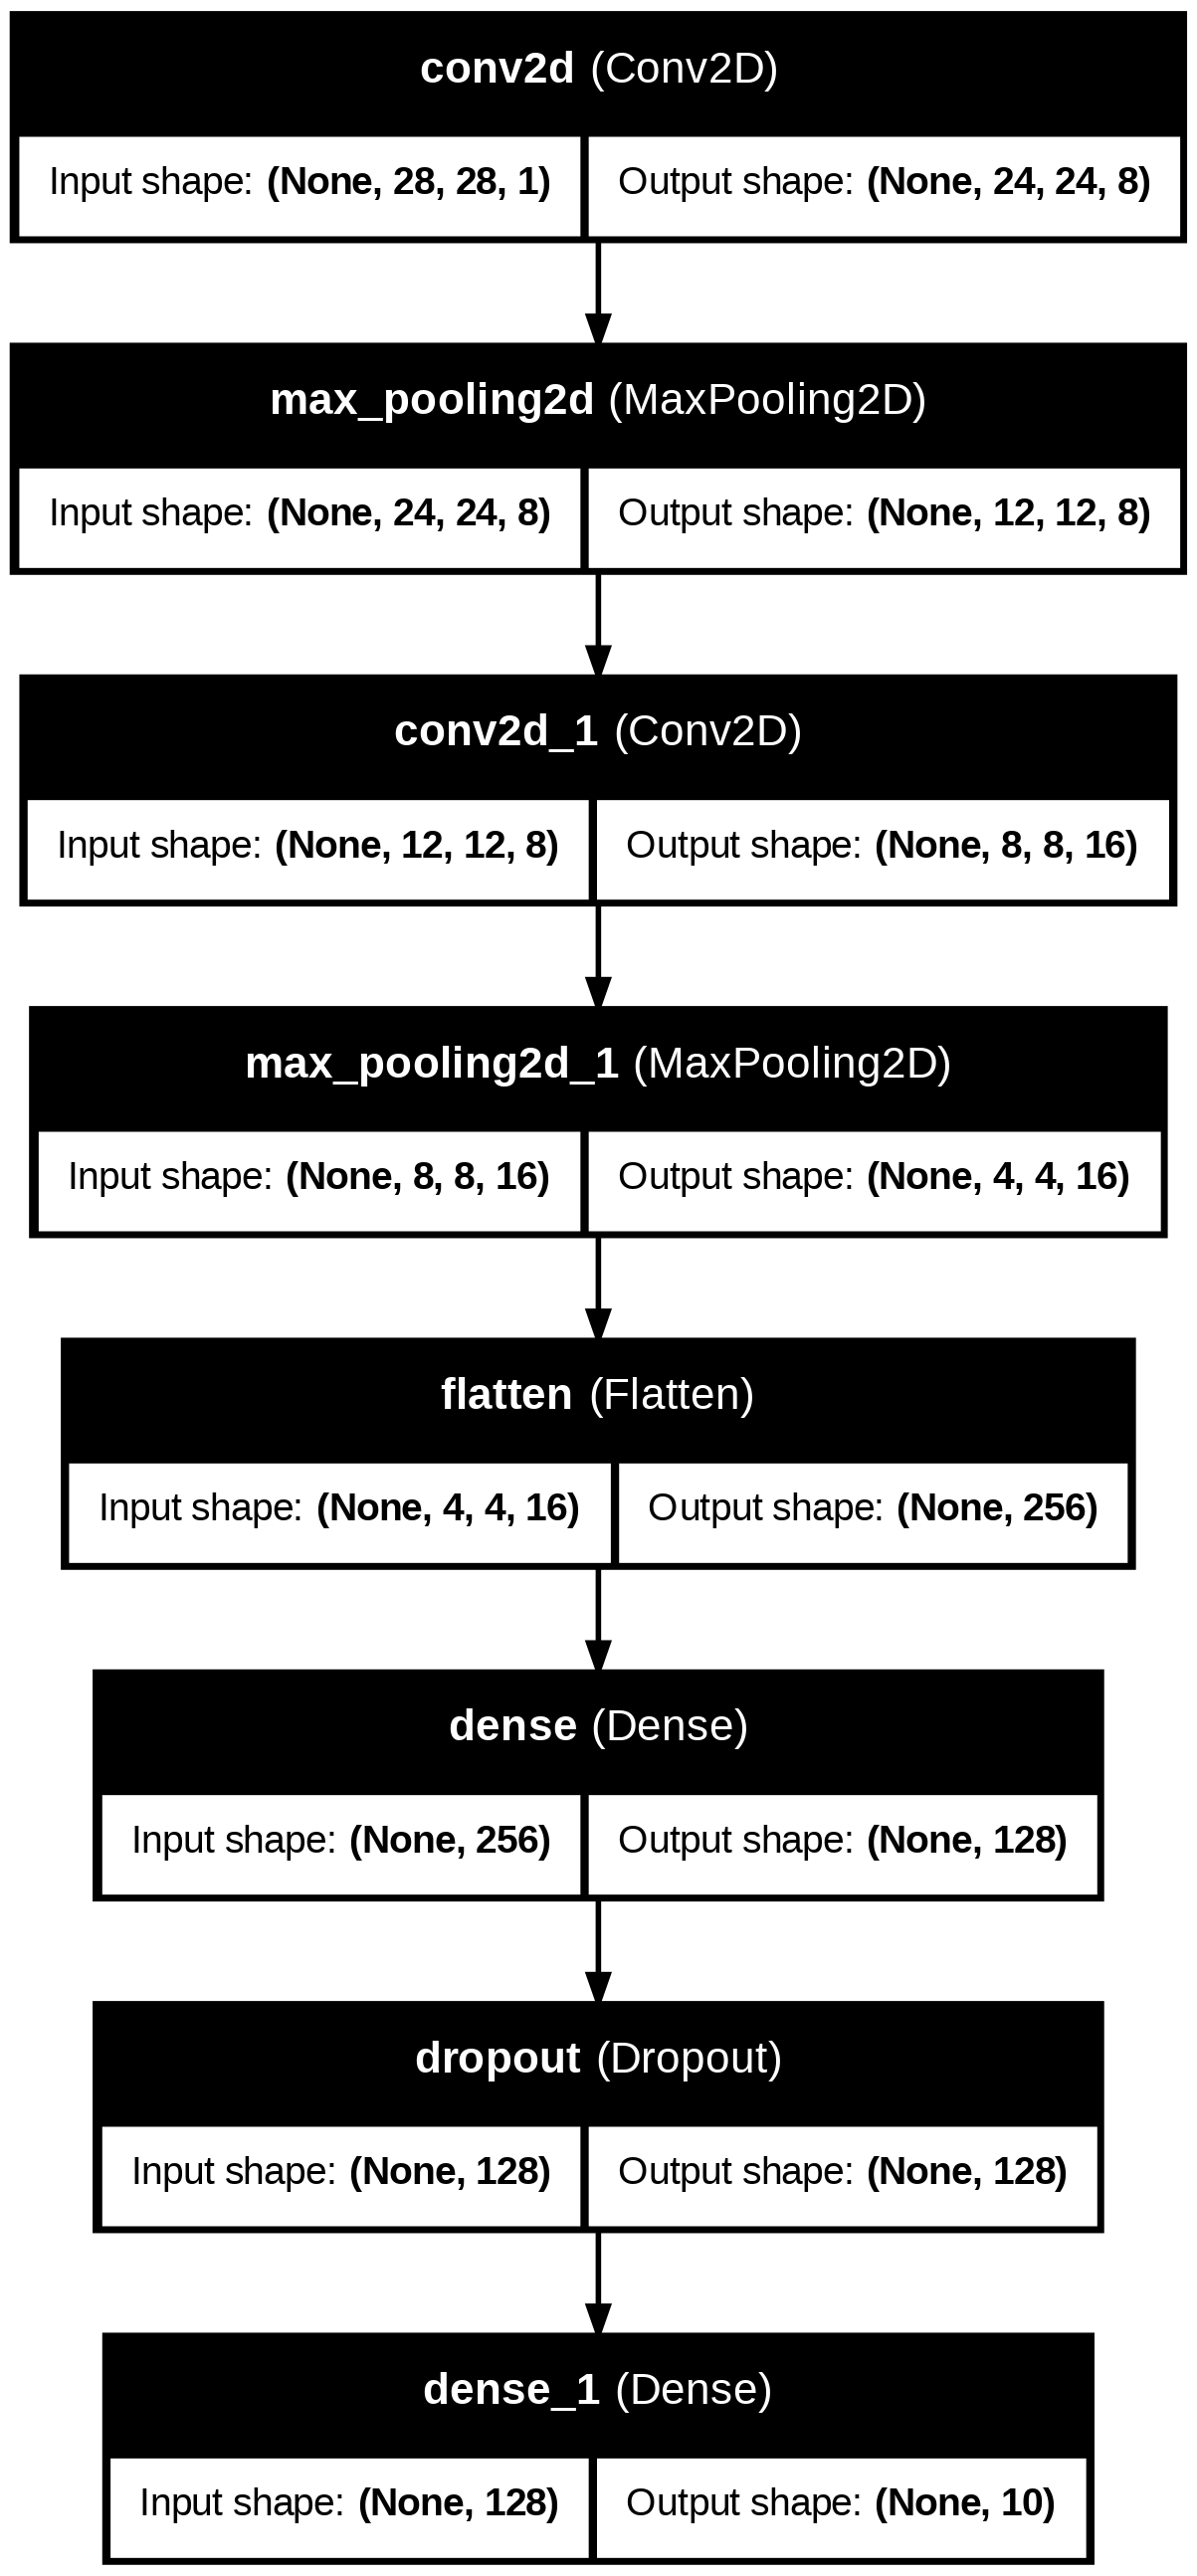

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


### **5.3 | Biên dịch mô hình bằng keras.optimizers.Adam**

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


- **optimizer=Adam()**:
  - Adam là thuật toán tối ưu hóa, giúp cập nhật trọng số của mô hình trong quá trình huấn luyện.
  
- **loss='sparse_categorical_crossentropy'**:
  - Đây là hàm mất mát được sử dụng cho bài toán phân loại đa lớp. Khi bạn làm việc với các lớp phân loại, hàm mất mát này giúp mô hình cải thiện dự đoán của mình.
  - "Sparse" có nghĩa là bạn chỉ cung cấp chỉ số lớp cho mỗi mẫu dữ liệu thay vì cung cấp vector one-hot (ví dụ: lớp 0 là `[1, 0, 0, 0]`, lớp 1 là `[0, 1, 0, 0]`, ...).

- **metrics=['accuracy']**:
  - Đo lường độ chính xác (accuracy), tức là tỷ lệ mẫu được phân loại chính xác. Đây là chỉ số phổ biến trong các bài toán phân loại.


### **5.4 | Huấn luyện mô hình**

In [ ]:
import os
import tensorflow as tf

log_dir = os.path.join("logs", "fit")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.8182 - loss: 0.5877 - val_accuracy: 0.9689 - val_loss: 0.0936
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9685 - loss: 0.1043 - val_accuracy: 0.9755 - val_loss: 0.0757
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9802 - loss: 0.0687 - val_accuracy: 0.9787 - val_loss: 0.0703
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9830 - loss: 0.0513 - val_accuracy: 0.9832 - val_loss: 0.0576
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.9867 - val_loss: 0.0460
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9820 - val_loss: 0.0559
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9871 - val_loss: 0.0467
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9912 -


### Nhận xét
- Độ chính xác trên tập huấn luyện và tập kiểm tra đều tăng dần, đạt trên 98,8% ở cuối quá trình huấn luyện.
- Hàm mất mát giảm dần ở cả hai tập dữ liệu, cho thấy mô hình đang học tốt.
- Sự chênh lệch giữa `accuracy` và `val_accuracy` là nhỏ, cho thấy mô hình không bị quá khớp.

# **6 | Đánh giá mô hình**

### **6.1 | Đồ thị đường cong Loss cho huấn luyện và kiểm tra (validation)**

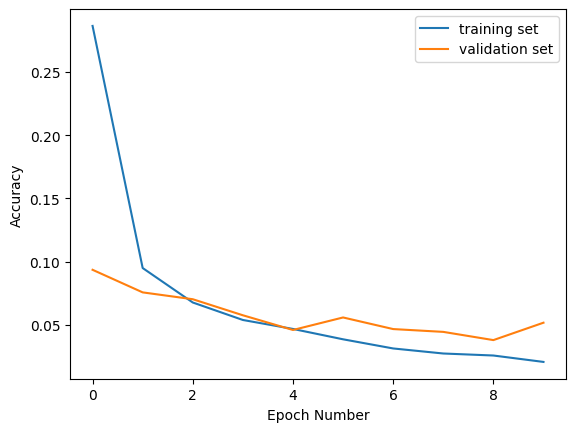

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

### **6.2 | Đồ thị đường cong Accuracy cho huấn luyện và kiểm tra (validation)**

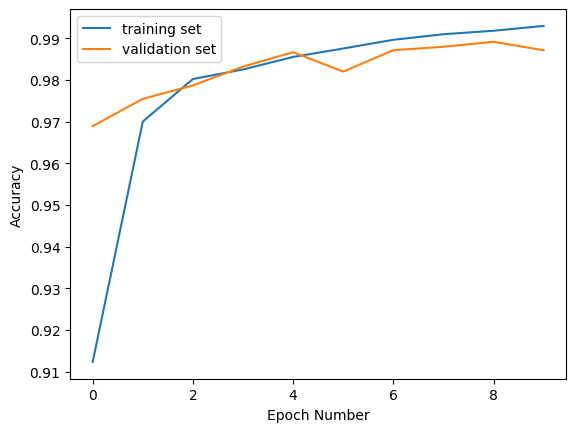

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

### **6.3 | Đánh giá độ chính xác của mô hình**

Chúng ta cần so sánh độ chính xác của mô hình trên tập huấn luyện và tập xác thực. Chúng ta mong đợi mô hình của mình hoạt động tương tự trên cả hai tập. Nếu hiệu suất trên tập xác thực kém so với tập huấn luyện thì đó sẽ là chỉ báo cho chúng ta biết rằng mô hình bị quá khớp và chúng ta có vấn đề "phương sai cao".

#### **6.3.1 | Hiệu suất của bộ dữ liệu huấn luyện (Performance of training dataset)**

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [ ]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.011057422496378422
Train accuracy:  0.9964285492897034


#### **6.3.2 | Hiệu suất của bộ dữ liệu validation**

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.05173088237643242
Validation accuracy:  0.9871428608894348


#### **6.3.3 | Save and load the model**

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

#### **6.3.4 | Hiển thị dự đoán dữ liệu trên thực tế xác thực và hiển thị cách các chữ số đã được viết**

In [ ]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,5.554200e-07,9.999927e-01,6.826403e-07,2.094161e-12,1.673369e-09,5.995873e-11,8.471321e-08,1.895575e-09,5.903454e-06,4.138735e-10
1,1.210528e-15,1.126825e-10,4.870353e-13,9.999974e-01,5.728306e-15,5.314302e-08,9.171269e-18,2.565764e-11,1.770968e-08,2.445653e-06
2,2.710044e-12,1.588370e-13,7.606087e-09,4.171458e-09,7.121959e-14,1.772452e-09,8.669528e-12,5.026156e-13,9.999999e-01,2.511937e-09
3,9.328555e-10,9.999996e-01,3.705701e-09,1.145030e-11,1.866649e-08,2.439801e-10,3.427692e-08,4.171139e-07,1.006672e-09,5.867410e-10
4,7.704446e-14,1.388823e-15,7.685605e-13,5.453373e-09,1.519465e-07,1.214073e-10,3.107555e-19,4.822235e-08,2.383800e-07,9.999995e-01
...,...,...,...,...,...,...,...,...,...,...
8395,4.591201e-18,2.090057e-13,7.067868e-11,7.650925e-18,9.999999e-01,1.467980e-13,2.010625e-12,3.277781e-14,1.155992e-14,1.581466e-09
8396,4.840782e-09,9.898534e-14,4.657066e-13,1.086686e-07,5.817323e-12,9.994901e-01,5.039574e-04,1.722214e-15,5.752084e-06,1.334467e-10
8397,2.189550e-13,1.540342e-12,8.744523e-13,2.308376e-14,2.203726e-11,1.805439e-10,4.372992e-17,9.999999e-01,2.276500e-12,1.307158e-10
8398,1.770270e-09,1.963716e-16,1.746469e-12,4.726551e-15,2.359730e-15,6.588386e-09,9.999999e-01,1.337580e-17,6.452014e-09,3.014772e-13


In [ ]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


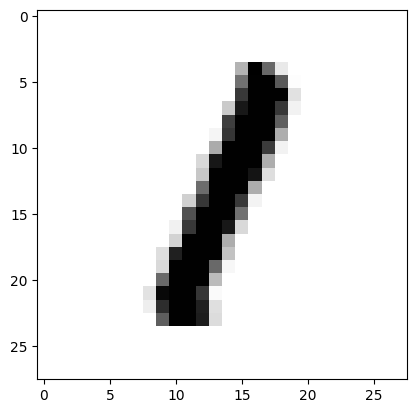

In [ ]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

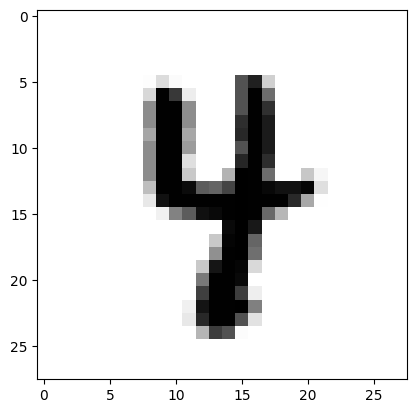

In [ ]:
plt.imshow(x_validation_normalized[12].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show() #mảng thứ 13

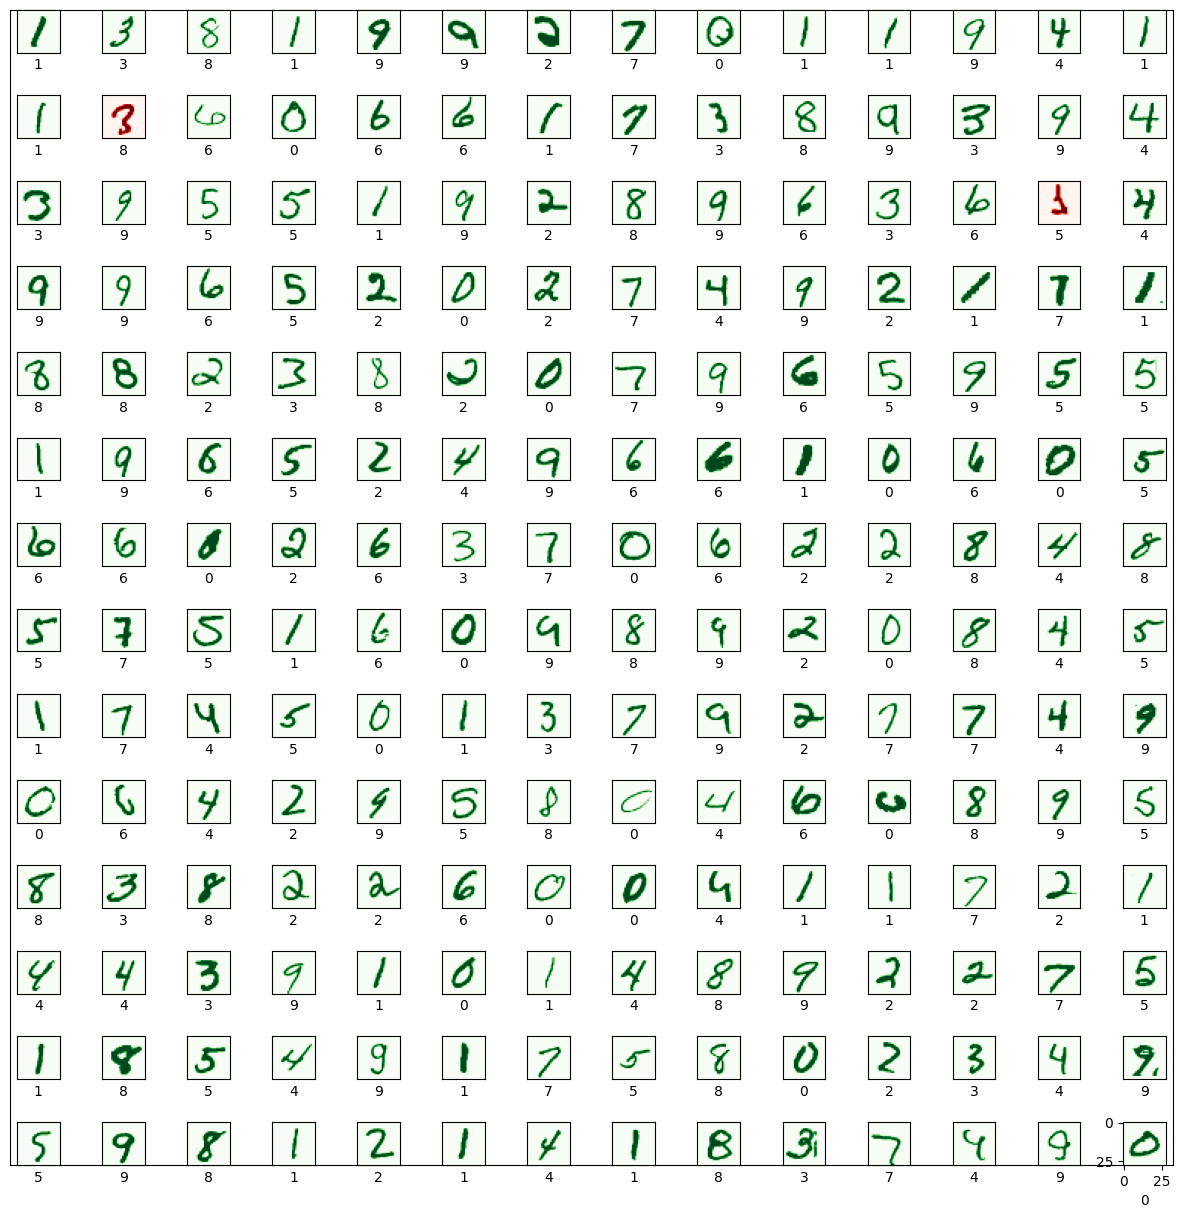

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

#### **6.3.5 | Ma trận nhầm lẫn của dữ liệu validation**

Ma trận nhầm lẫn cho thấy những số nào được mô hình nhận dạng tốt và những số nào mà mô hình thường nhầm lẫn để nhận dạng chính xác

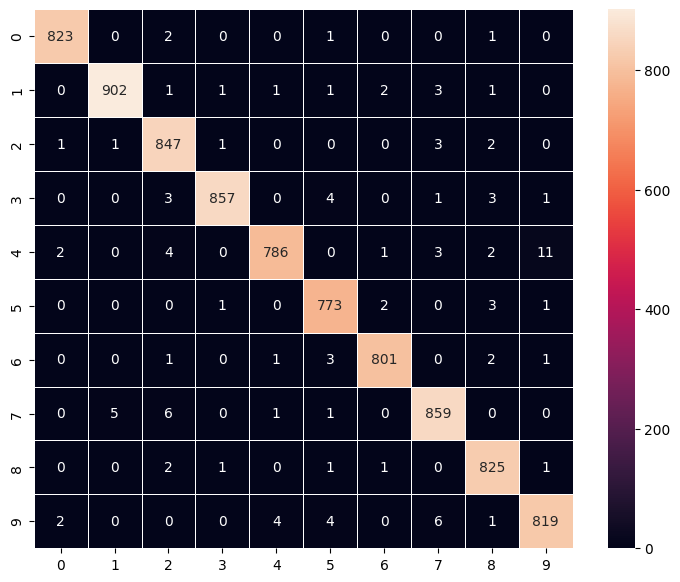

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

TP = confusion_matrix[1, 1].numpy()
FP = confusion_matrix[0, 1].numpy()
FN = confusion_matrix[1, 0].numpy()
TN = confusion_matrix[0, 0].numpy()

# Tính Accuracy, Precision, Recall, F1-Score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


# **7 | Dự đoán mô hình dựa trên dữ liệu chưa từng nhìn thấy(test data)**

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
predictions_one_hot: (28000, 10)


In [ ]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.217962e-13,4.534405e-11,9.999999e-01,3.893021e-09,7.180629e-13,4.428357e-13,2.716753e-11,4.568542e-10,9.039191e-09,3.104901e-12
1,9.999906e-01,7.564256e-11,4.729155e-09,4.123694e-09,1.425647e-12,1.812350e-06,7.561779e-06,1.946166e-08,1.164378e-09,1.866583e-08
2,7.042346e-10,8.051242e-09,5.543443e-08,9.602206e-07,2.139003e-04,3.601200e-08,1.922399e-12,3.019369e-05,1.055308e-04,9.996493e-01
3,6.658143e-01,2.804465e-07,2.759847e-03,4.956264e-04,1.051121e-05,3.313121e-06,1.858727e-05,9.170077e-06,6.116601e-04,3.302766e-01
4,4.900086e-12,6.176080e-10,7.731314e-08,9.999834e-01,2.329692e-15,4.607711e-08,2.401154e-13,4.562826e-09,1.582173e-05,5.925326e-07
...,...,...,...,...,...,...,...,...,...,...
27995,1.824367e-14,5.687095e-18,2.174908e-13,1.170231e-09,2.200885e-09,1.630619e-09,1.178177e-20,3.903432e-08,2.153802e-08,9.999999e-01
27996,3.788893e-09,4.803987e-11,2.170550e-07,1.793522e-09,2.608657e-11,1.753005e-09,3.200644e-16,9.999996e-01,6.966017e-11,1.181322e-07
27997,6.297261e-22,3.476332e-14,2.271129e-17,9.999999e-01,1.843467e-23,3.870363e-14,1.977957e-22,7.076233e-14,8.500705e-13,1.815588e-14
27998,4.067175e-14,1.592906e-13,1.659753e-10,2.751344e-09,1.476232e-06,1.864563e-09,3.515024e-17,3.363146e-08,4.875827e-07,9.999979e-01


### **7.1 | Trực quan hóa dữ liệu dự kiến ​​​​từ bộ kiểm tra và cách viết các chữ số**

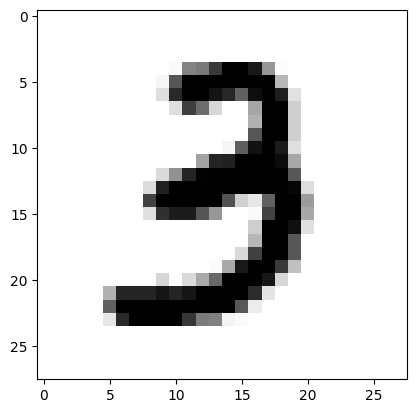

In [ ]:
plt.imshow(x_test_normalized[7].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

## **8 | Kết quả**

In [ ]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1



875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [ ]:
test_pred.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Total incorrect predictions: 108


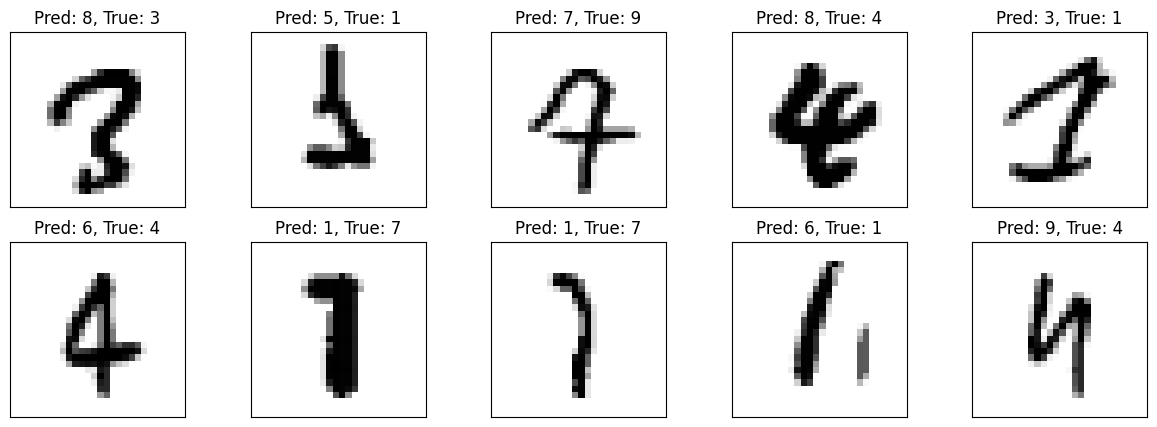

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
predictions = np.argmax(model.predict(x_validation_normalized), axis=1)
incorrect_predictions = np.where(predictions != y_validation_re)[0]
print(f"Total incorrect predictions: {len(incorrect_predictions)}")
# Hiển thị một số hình ảnh dự đoán sai
numbers_to_display = 10  # Chỉ hiển thị 10 hình ảnh sai
plt.figure(figsize=(15, 5))
for i, index in enumerate(incorrect_predictions[:numbers_to_display]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_validation_normalized[index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
    plt.title(f"Pred: {predictions[index]}, True: {y_validation_re[index]}")
    plt.xticks([])
    plt.yticks([])

plt.show()


In [ ]:
import joblib
# Sau khi huấn luyện mô hình:
joblib.dump(model, 'model_mnist.joblib')  # Lưu mô hình


['model_mnist.joblib']

In [ ]:
model = joblib.load('model_mnist.joblib')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model = joblib.load('/content/model_mnist.joblib')


In [ ]:
test_pred.to_csv('submission.csv', index = False)

Saving s8.png to s8 (3).png


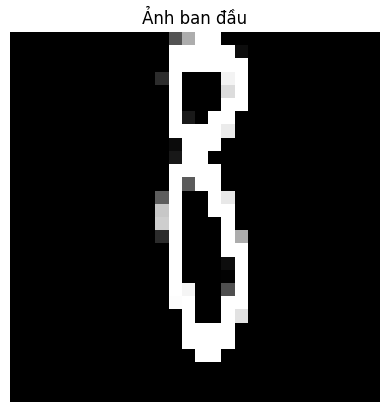

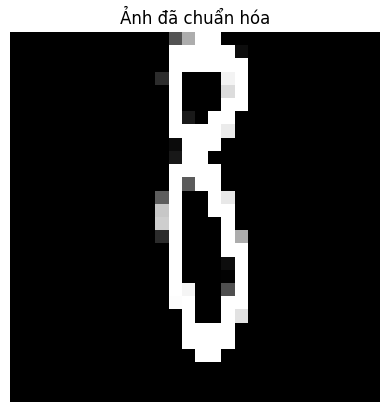

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Lớp 0: 0.12%
Lớp 1: 0.03%
Lớp 2: 0.00%
Lớp 3: 0.01%
Lớp 4: 0.00%
Lớp 5: 0.06%
Lớp 6: 32.76%
Lớp 7: 0.00%
Lớp 8: 67.02%
Lớp 9: 0.00%
Dự đoán chữ số là: 8


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



def predict_digit(image_data):
    """
    Predicts the digit in the given image data using a pre-trained model.

    Args:
        image_data (numpy.ndarray): The image data as a NumPy array.
    """
    # Chuyển ảnh thành kích thước 28x28 pixel nếu cần
    if image_data.shape != (28, 28):
        image_data = cv2.resize(image_data, (28, 28))

    # Hiển thị ảnh ban đầu
    plt.imshow(image_data, cmap='gray')
    plt.title("Ảnh ban đầu")
    plt.axis('off')
    plt.show()

    # Chuẩn hóa ảnh: Chia cho 255 để giá trị nằm trong khoảng 0-1
    img_resized = image_data / 255.0

    # Kiểm tra ảnh đã chuẩn hóa
    plt.imshow(img_resized, cmap='gray')
    plt.title("Ảnh đã chuẩn hóa")
    plt.axis('off')
    plt.show()

    # Thêm chiều kênh để trở thành (28, 28, 1)
    img_resized = img_resized.reshape(1, 28, 28, 1)

    # Tải mô hình đã huấn luyện
    model = load_model('/content/digits_recognition_cnn.h5')  # Đường dẫn đúng của mô hình

    # Dự đoán chữ số từ mô hình
    prediction = model.predict(img_resized)

    # Hiển thị xác suất dự đoán cho từng lớp dưới dạng dễ đọc
    probabilities = np.round(prediction[0], decimals=4)
    for i, prob in enumerate(probabilities):
        print(f"Lớp {i}: {prob * 100:.2f}%")

    # Lấy chỉ số của lớp có xác suất cao nhất
    predicted_digit = np.argmax(prediction)

    print(f'Dự đoán chữ số là: {predicted_digit}')

uploaded = files.upload()
image = Image.open(list(uploaded.keys())[0]).convert('L')
image_data = np.array(image)

predict_digit(image_data)
